<a href="https://colab.research.google.com/github/asma0333/Task_Sharing_and_Tracking_app/blob/main/deep_learning_practical_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

x1=[0,0,1,1]
x2=[0,1,0,1]
yreal=[0,0,1,1]
ypred_list=[]
b=1
lr=1
w1=float(0.5)
w2=float(1.5)
for i in range(len(x1)):
  y= (w1*x1[i])+(w2*x2[i])+b
  print(float(y))
  if y>0:
    ypred=1
  else:
    ypred=0
  ypred_list.append(ypred)
print("yreal",yreal)
print("ypred",ypred_list)
if ypred_list==yreal:
  print("weights are correct")
else:
  for i in range(len(x1)):
        error = yreal[i] - ypred_list[i]
        w1= w1+lr * error * x1[i]
        w2= w2+lr * error * x2[i]
        print("Updated weights","w1=",w1,"w2=",w2)

1.0
2.5
1.5
3.0
yreal [0, 0, 1, 1]
ypred [1, 1, 1, 1]
Updated weights w1= 0.5 w2= 1.5
Updated weights w1= 0.5 w2= 0.5
Updated weights w1= 0.5 w2= 0.5
Updated weights w1= 0.5 w2= 0.5


# deep learning practical  2

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import zipfile
import os

# Path to the zip file in Google Drive
zip_file_path = '/content/drive/MyDrive/flowers.zip'  # Replace with your actual file path
extract_path = '/content/dataset'  # Path where you want to extract the files

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"Dataset extracted to {extract_path}")

# Create an empty list to store image paths
imagepaths = []
labels=[]

# Iterate through the extracted files and add image paths to the list
for root, dirs, files in os.walk(extract_path):
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):  # Add more extensions if needed
            imagepaths.append(os.path.join(root, file))
            labels.append(os.path.basename(root))


Dataset extracted to /content/dataset


In [ ]:
print(len (labels))
print(len(imagepaths))

4317
4317


In [ ]:
print(labels[500])

sunflower


In [ ]:
import os
from collections import Counter
extract_path = '/content/drive/MyDrive/flowers_extracted'  # Path to the flowers_extracted folder
imagepaths = []# Create an empty list to store image paths and labels
labels = []

# Define the two classes you want to use (replace with actual class names)
selected_classes = ['daisy', 'rose']  # Classes: daisy and rose
num_images_per_class = 60  # 50 images per class

# Initialize counters for each class
class_counts = {cls: 0 for cls in selected_classes}

# Iterate through the extracted files and add images from the selected classes
count = 0
for root, dirs, files in os.walk(extract_path):
    # Get the current class name (folder name)
    class_name = os.path.basename(root)

    # Only process the selected classes
    if class_name in selected_classes:
        for file in files:
            # Check if the file is an image (jpg, png, jpeg)
            if file.lower().endswith(('.png', '.jpg', '.jpeg')) and class_counts[class_name] < num_images_per_class:
                imagepaths.append(os.path.join(root, file))
                labels.append(class_name)
                class_counts[class_name] += 1
                count += 1

                # Stop once 100 images have been collected (50 from each class)
                if count >= 120:
                    break
    if count >= 120:
        break

# Check how many images we collected
print(f"Loaded {len(imagepaths)} images.")

# Print some sample labels and paths for verification
print(labels[:5])
print(imagepaths[:5])

# Check label distribution to ensure you have 50 images from each class
print("Label distribution:", Counter(labels))





Loaded 120 images.
['daisy', 'daisy', 'daisy', 'daisy', 'daisy']
['/content/drive/MyDrive/flowers_extracted/flowers/daisy/100080576_f52e8ee070_n.jpg', '/content/drive/MyDrive/flowers_extracted/flowers/daisy/10140303196_b88d3d6cec.jpg', '/content/drive/MyDrive/flowers_extracted/flowers/daisy/10172379554_b296050f82_n.jpg', '/content/drive/MyDrive/flowers_extracted/flowers/daisy/10172567486_2748826a8b.jpg', '/content/drive/MyDrive/flowers_extracted/flowers/daisy/10172636503_21bededa75_n.jpg']
Label distribution: Counter({'daisy': 60, 'rose': 60})


In [ ]:
import cv2
import numpy as np
from skimage.feature import hog  # For HOG feature extraction

# Initialize x as a list (images) and y as a list (labels)
x = []
y = []

# Loop through images and extract HOG features
for i, img_path in enumerate(imagepaths):
    img = cv2.imread(img_path)  # Read the image
    img = cv2.resize(img, (224, 224))  # Resize to 224x224
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale

    # Extract HOG features
    hog_features = hog(
        img_gray,
        orientations=9,
        pixels_per_cell=(8, 8),
        cells_per_block=(2, 2),
        block_norm='L2-Hys',
        feature_vector=True
    )

    x.append(hog_features)  # Add HOG features to x
    y.append(labels[i])  # Add label to y

# Convert x and y to NumPy arrays
x = np.array(x)  # HOG feature vectors
y = np.array(y)  # Labels

# Print the shapes and check the results
print(f"x shape: {x.shape}, y shape: {y.shape}")
print(f"Unique labels: {set(y)}")


x shape: (120, 26244), y shape: (120,)
Unique labels: {'daisy', 'rose'}


In [ ]:
LR=0.01
EPOCHS=7
BATCH_SIZE=32
IMG_SIZE=224

/content/drive/MyDrive/flowers_extracted/flowers/rose/11233672494_d8bf0a3dbf_n.jpg
(263, 320, 3)


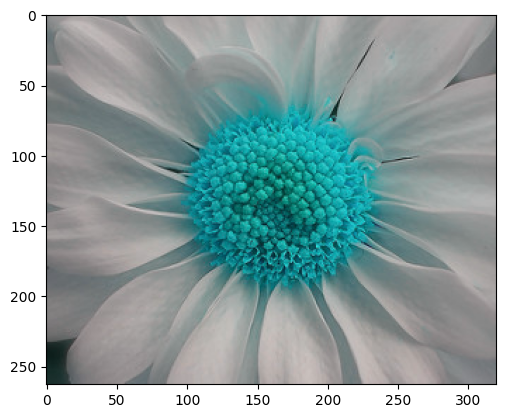

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt # Import matplotlib.pyplot

print(imagepaths[66])

image =cv2.imread(imagepaths[0])
print(image.shape)
plt.imshow(image)
plt.show()


In [ ]:
!pip install tensorflow #Install TensorFlow if you haven't already
from tensorflow.keras.utils import to_categorical #Import to_categorical from TensorFlow's Keras utilities
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
y_encoded=le.fit_transform(y)
y_encoded=to_categorical(y_encoded)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.3, random_state=42)
x_train = x_train / 255.0
x_test = x_test / 255.0


In [ ]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)


x_train shape: (84, 26244)
y_train shape: (84, 2)


In [ ]:
from tensorflow.keras.models import Sequential  # Correct import for Sequential model
from tensorflow.keras.layers import Dense       # Correct import for Dense layer
import numpy as np
ann = Sequential()  # Sequential model
ann.add(Dense(64, input_dim=26244, activation='relu'))  # First layer: Input layer with 4 features
ann.add(Dense(64, activation='tanh'))  # Hidden layer
ann.add(Dense(32, activation='tanh'))  # Hidden layer
ann.add(Dense(2, activation='sigmoid'))  # Output layer with 2 output neurons
ann.compile(loss='MSE', optimizer='adam', metrics=['accuracy'])
ann.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)
test_loss, test_accuracy = ann.evaluate(x_test, y_test)
print("Test Loss: ", test_loss)
print("Test Accuracy: ", test_accuracy)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 578ms/step - accuracy: 0.4348 - loss: 0.2502 - val_accuracy: 0.2353 - val_loss: 0.2572
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.5730 - loss: 0.2478 - val_accuracy: 0.2353 - val_loss: 0.2638
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.5535 - loss: 0.2464 - val_accuracy: 0.2353 - val_loss: 0.2609
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5378 - loss: 0.2467 - val_accuracy: 0.2353 - val_loss: 0.2559
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5417 - loss: 0.2462 - val_accuracy: 0.2353 - val_loss: 0.2559
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5289 - loss: 0.2484 
Test Loss:  0.24841263890266418
Test Accuracy:  0.5277777910232544


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

y_pred = ann.predict(x_test)

# Convert predictions to class labels (0 or 1) by thresholding at 0.5
y_pred_classes = (y_pred > 0.5).astype("int32")  # Convert probabilities to class labels

# If y_test is already in a binary format, you can just use it directly
y_true_classes = y_test  # Assuming y_test is already a binary vector (0 or 1)


# Convert y_true_classes and y_pred_classes to single-label format using argmax
y_true_classes = np.argmax(y_true_classes, axis=1)  # Get the index of the maximum value (class label)
y_pred_classes = np.argmax(y_pred_classes, axis=1)  # Get the index of the maximum value (class label)


# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Calculate precision, recall, F1 score, etc. using y_true_classes and y_pred_classes
precision = precision_score(y_true_classes, y_pred_classes)
recall = recall_score(y_true_classes, y_pred_classes)
f1 = f1_score(y_true_classes, y_pred_classes)
accuracy = accuracy_score(y_true_classes, y_pred_classes)

# Print the confusion matrix and metrics
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("\nClassification Report:\n", classification_report(y_true_classes, y_pred_classes))


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Confusion Matrix:
 [[19  0]
 [17  0]]
Accuracy: 0.5277777777777778
Precision: 0.0
Recall: 0.0
F1 Score: 0.0

Classification Report:
               precision    recall  f1-score   support

           0       0.53      1.00      0.69        19
           1       0.00      0.00      0.00        17

    accuracy                           0.53        36
   macro avg       0.26      0.50      0.35        36
weighted avg       0.28      0.53      0.36        36



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

practical no. 3

Training with Adam optimizer...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Adam Test Accuracy: 1.0000

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Training with RMSprop optimizer...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


RMSprop Test Accuracy: 0.9667

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Training with SGD optimizer...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


SGD Test Accuracy: 0.9000

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


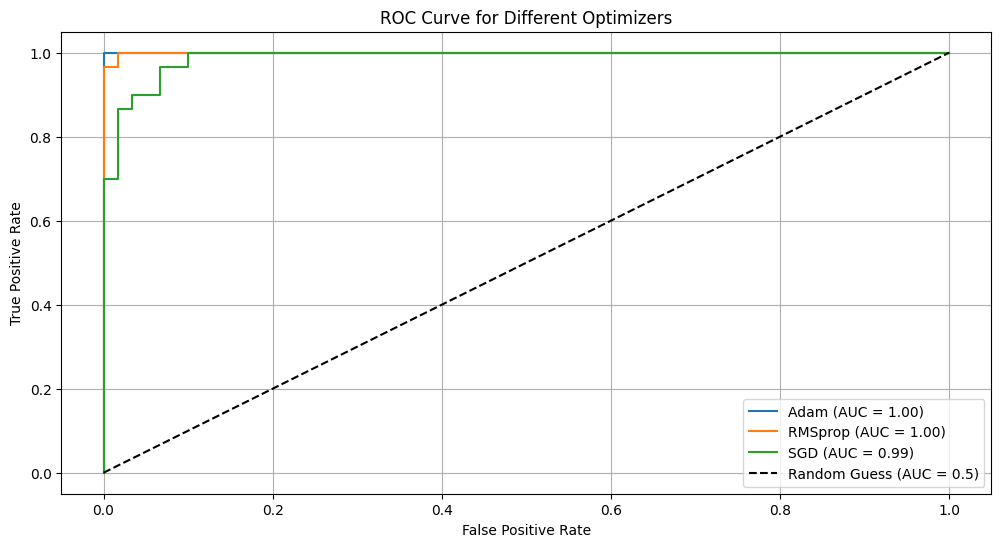

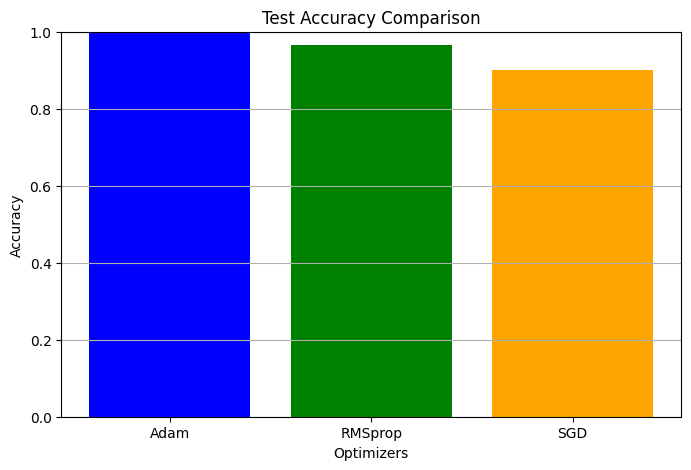

In [ ]:
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Labels

# Preprocess the dataset
scaler = StandardScaler()  # Standardize features to have mean=0 and std=1
X = scaler.fit_transform(X)

# One-hot encode the labels
y = to_categorical(y, num_classes=3)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to build the model
def build_model():
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(4,)),  # Input layer (4 features in Iris dataset)
        tf.keras.layers.Dense(16, activation='relu'),  # Hidden layer with 16 neurons
        tf.keras.layers.Dense(8, activation='relu'),   # Hidden layer with 8 neurons
        tf.keras.layers.Dense(3, activation='softmax') # Output layer with 3 classes (softmax for multi-class)
    ])
    return model

# Define optimizers
optimizers = {
    'Adam': tf.keras.optimizers.Adam(learning_rate=0.01),
    'RMSprop': tf.keras.optimizers.RMSprop(learning_rate=0.01),
    'SGD': tf.keras.optimizers.SGD(learning_rate=0.01)
}

# Train and evaluate models with different optimizers
history_dict = {}
test_accuracies = {}
roc_data = {}

for name, optimizer in optimizers.items():
    print(f"Training with {name} optimizer...")
    model = build_model()
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, epochs=50, batch_size=8, validation_split=0.2, verbose=0)
    history_dict[name] = history

    # Evaluate the model
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    test_accuracies[name] = test_accuracy
    print(f"{name} Test Accuracy: {test_accuracy:.4f}\n")

    # Get model predictions for ROC
    y_pred = model.predict(X_test)

    # Compute ROC curve and AUC for each class
    fpr, tpr, _ = roc_curve(y_test.ravel(), y_pred.ravel())
    roc_auc = auc(fpr, tpr)

    if name not in roc_data:
        roc_data[name] = {'fpr': fpr, 'tpr': tpr, 'auc': roc_auc}

# Plot ROC curve for each optimizer
plt.figure(figsize=(12, 6))
for name, data in roc_data.items():
    plt.plot(data['fpr'], data['tpr'], label=f'{name} (AUC = {data["auc"]:.2f})')

# Plot the diagonal (random guessing)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.5)')

plt.title('ROC Curve for Different Optimizers')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot test accuracies
plt.figure(figsize=(8, 5))
plt.bar(test_accuracies.keys(), test_accuracies.values(), color=['blue', 'green', 'orange'])
plt.title('Test Accuracy Comparison')
plt.xlabel('Optimizers')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()


Training with Adam optimizer...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Adam Accuracy: 1.0000, Precision: 1.0000, F1 Score: 1.0000
Training with RMSprop optimizer...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
RMSprop Accuracy: 1.0000, Precision: 1.0000, F1 Score: 1.0000
Training with SGD optimizer...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
SGD Accuracy: 0.9333, Precision: 0.9436, F1 Score: 0.9319


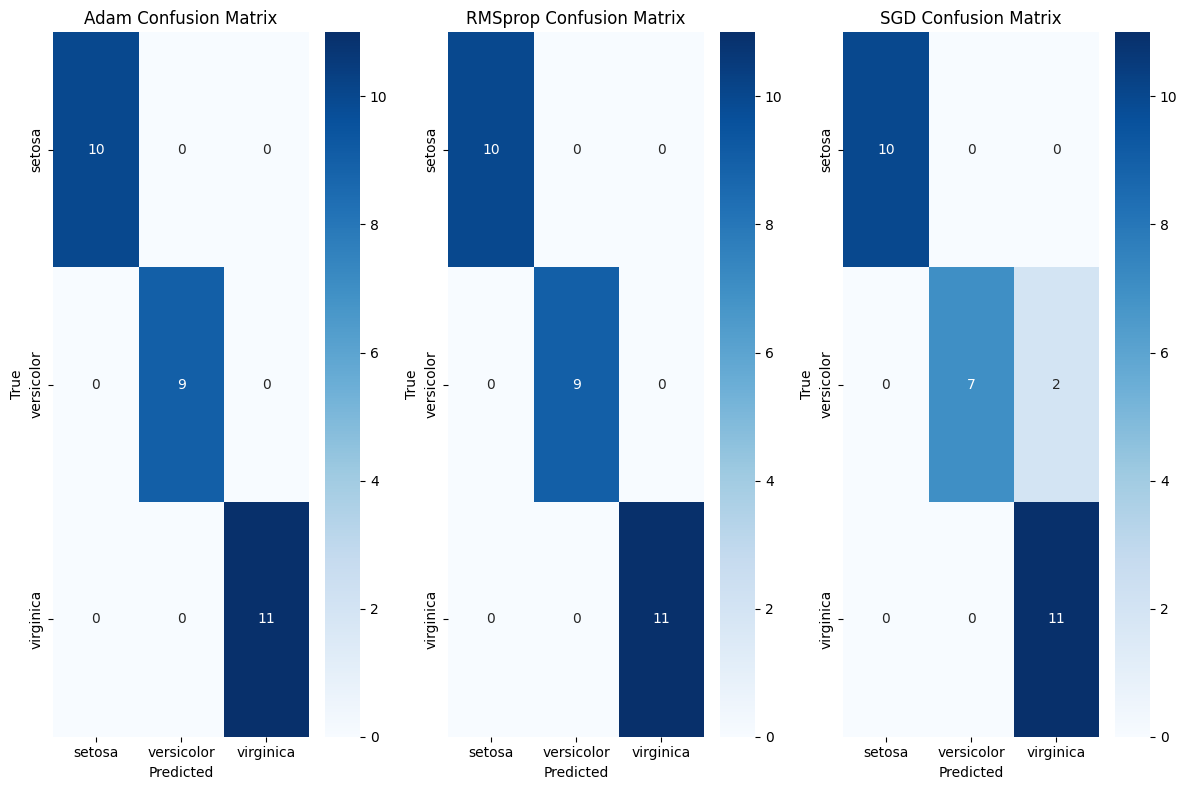

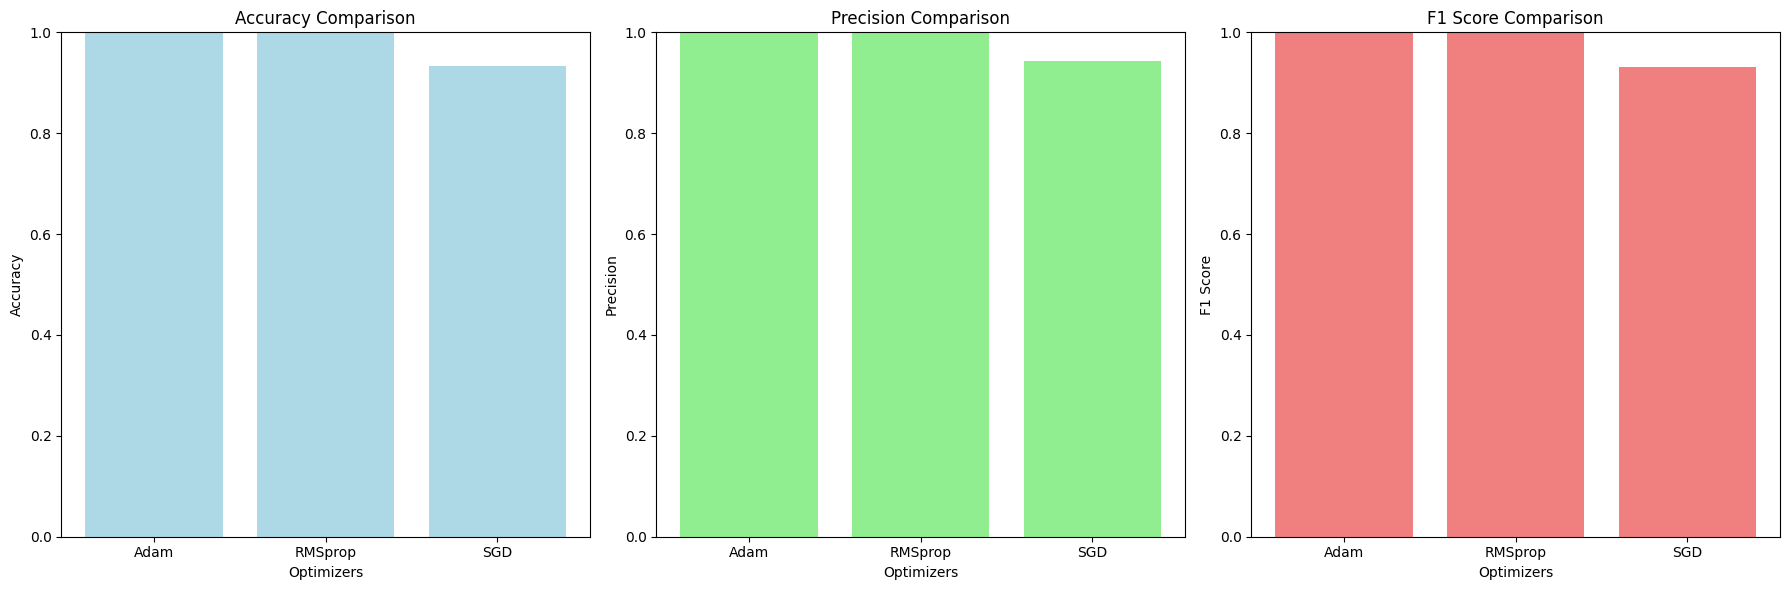

In [ ]:
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score
import seaborn as sns
from sklearn.metrics import roc_curve, auc

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Labels

# Preprocess the dataset
scaler = StandardScaler()  # Standardize features to have mean=0 and std=1
X = scaler.fit_transform(X)

# One-hot encode the labels
y = to_categorical(y, num_classes=3)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to build the model
def build_model():
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(4,)),  # Input layer (4 features in Iris dataset)
        tf.keras.layers.Dense(16, activation='relu'),  # Hidden layer with 16 neurons
        tf.keras.layers.Dense(8, activation='relu'),   # Hidden layer with 8 neurons
        tf.keras.layers.Dense(3, activation='softmax') # Output layer with 3 classes (softmax for multi-class)
    ])
    return model

# Define optimizers
optimizers = {
    'Adam': tf.keras.optimizers.Adam(learning_rate=0.01),
    'RMSprop': tf.keras.optimizers.RMSprop(learning_rate=0.01),
    'SGD': tf.keras.optimizers.SGD(learning_rate=0.01)
}

# Store metrics for each optimizer
metrics_data = {
    'accuracy': {},
    'precision': {},
    'f1_score': {},
    'confusion_matrix': {},
    'roc_data': {}
}

# Train and evaluate models with different optimizers
for name, optimizer in optimizers.items():
    print(f"Training with {name} optimizer...")

    # Recreate the optimizer for each model training
    model = build_model()

    # Compile model with the new optimizer
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train, epochs=50, batch_size=8, validation_split=0.2, verbose=0)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Convert predictions from probabilities to class labels
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_test, axis=1)

    # Confusion matrix
    cm = confusion_matrix(y_true_classes, y_pred_classes)
    metrics_data['confusion_matrix'][name] = cm

    # Accuracy
    accuracy = accuracy_score(y_true_classes, y_pred_classes)
    metrics_data['accuracy'][name] = accuracy

    # Precision
    precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
    metrics_data['precision'][name] = precision

    # F1 Score
    f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
    metrics_data['f1_score'][name] = f1

    # Compute ROC curve and AUC for each class
    fpr, tpr, _ = roc_curve(y_test.ravel(), y_pred.ravel())
    roc_auc = auc(fpr, tpr)
    metrics_data['roc_data'][name] = {'fpr': fpr, 'tpr': tpr, 'auc': roc_auc}

    print(f"{name} Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, F1 Score: {f1:.4f}")

# Plot Confusion Matrix
plt.figure(figsize=(12, 8))
for i, (name, cm) in enumerate(metrics_data['confusion_matrix'].items()):
    plt.subplot(1, 3, i + 1)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')

plt.tight_layout()
plt.show()

# Plot Accuracy, Precision, and F1 Score for each optimizer
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Accuracy
ax[0].bar(metrics_data['accuracy'].keys(), metrics_data['accuracy'].values(), color='lightblue')
ax[0].set_title('Accuracy Comparison')
ax[0].set_xlabel('Optimizers')
ax[0].set_ylabel('Accuracy')
ax[0].set_ylim(0, 1)

# Precision
ax[1].bar(metrics_data['precision'].keys(), metrics_data['precision'].values(), color='lightgreen')
ax[1].set_title('Precision Comparison')
ax[1].set_xlabel('Optimizers')
ax[1].set_ylabel('Precision')
ax[1].set_ylim(0, 1)

# F1 Score
ax[2].bar(metrics_data['f1_score'].keys(), metrics_data['f1_score'].values(), color='lightcoral')
ax[2].set_title('F1 Score Comparison')
ax[2].set_xlabel('Optimizers')
ax[2].set_ylabel('F1 Score')
ax[2].set_ylim(0, 1)

plt.tight_layout()
plt.show()